In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import math
import sklearn
from sklearn.linear_model import LogisticRegression
import scipy
import scipy.linalg
from scipy.linalg import *
from sympy import *
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")
import time


### Data exploratory

In [22]:
data = pd.read_csv('heart.csv')

In [5]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [26]:
# No missing values
print(data.isnull().values.any())
# row 164 is duplicated and drop it
print(data.duplicated()[data.duplicated()].index)
data = data.drop_duplicates()

False
Int64Index([  15,   31,   43,   55,   61,   64,   79,   82,   83,   84,
            ...
            1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024],
           dtype='int64', length=723)


In [28]:
# clean outliers with z-score > 3.5
data_clean = data[(np.abs(stats.zscore(data)) < 3.5).all(axis=1)]

#delete 6 outliers
print(data.shape)
print(data_clean.shape)

(302, 14)
(296, 14)


In [52]:
corr_matrix = data_clean.corr().round(4)
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# no paramenters are strongly correlate
upper
print((upper>0.8).values.sum())

0


<AxesSubplot:>

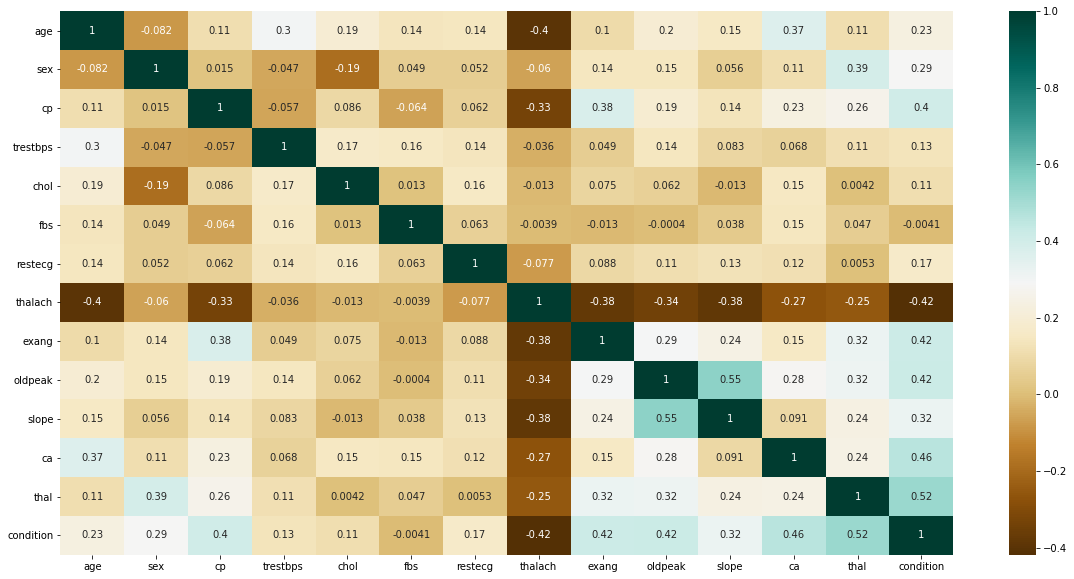

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap="BrBG",annot=True)

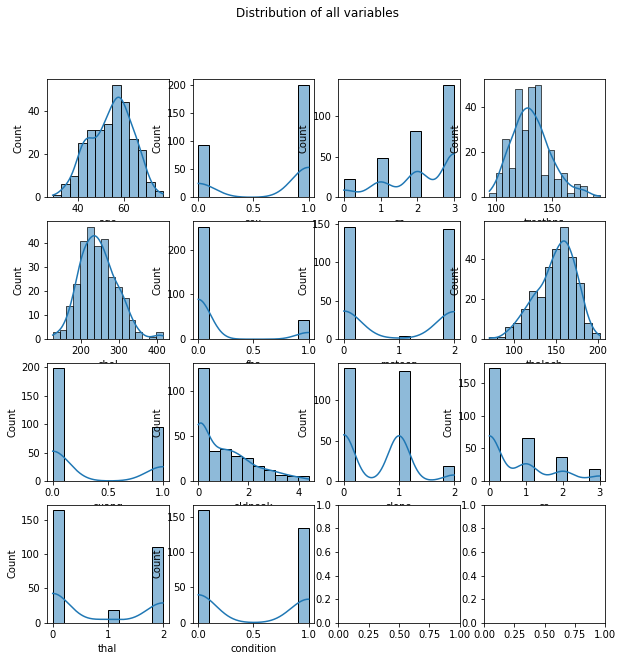

In [54]:
# disribution of data
fig, axs = plt.subplots(4, 4, figsize=(10,10))
count = 0
for i in range(4):
    for j in range(4):
        sns.histplot(data=data_clean, x=data_clean.columns[count], kde=True,ax=axs[i, j])
        if count >= 13:
            break
        count += 1
plt.suptitle('Distribution of all variables')
plt.show()

In [29]:
Y = data_clean.iloc[: , -1:]
X = data_clean.iloc[:,:-1]

In [30]:
#normalize
X_numeral =  X.iloc[:,[0,3,4,7,9]]
X_normal = X.copy()
for i in X_numeral.columns:
    X_normal[i] = (X_numeral[i]-X_numeral[i].mean())/np.sqrt(X_numeral[i].var())

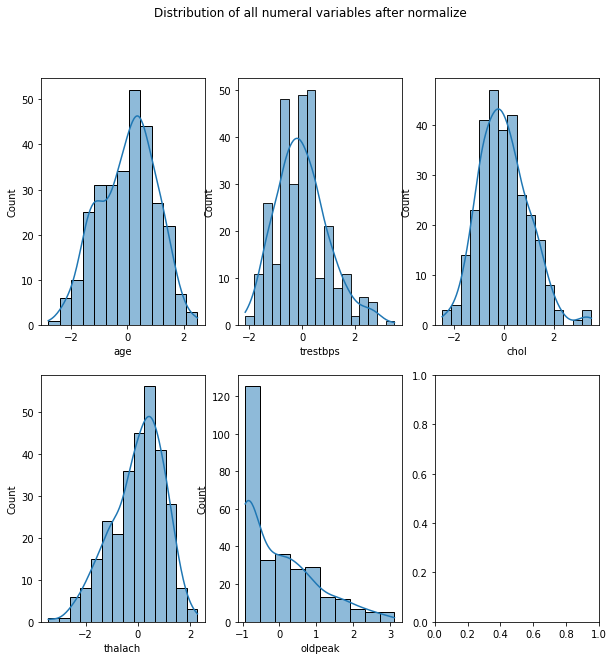

In [57]:
# distribution after normalze
fig, axs = plt.subplots(2, 3, figsize=(10,10))

sns.histplot(data=X_normal, x="age", kde=True,ax=axs[0, 0])
sns.histplot(data=X_normal, x="trestbps", kde=True,ax=axs[0, 1])
sns.histplot(data=X_normal, x="chol", kde=True,ax=axs[0, 2])
sns.histplot(data=X_normal, x="thalach", kde=True,ax=axs[1, 0])
sns.histplot(data=X_normal, x="oldpeak", kde=True,ax=axs[1, 1])

plt.suptitle('Distribution of all numeral variables after normalize')
plt.show()

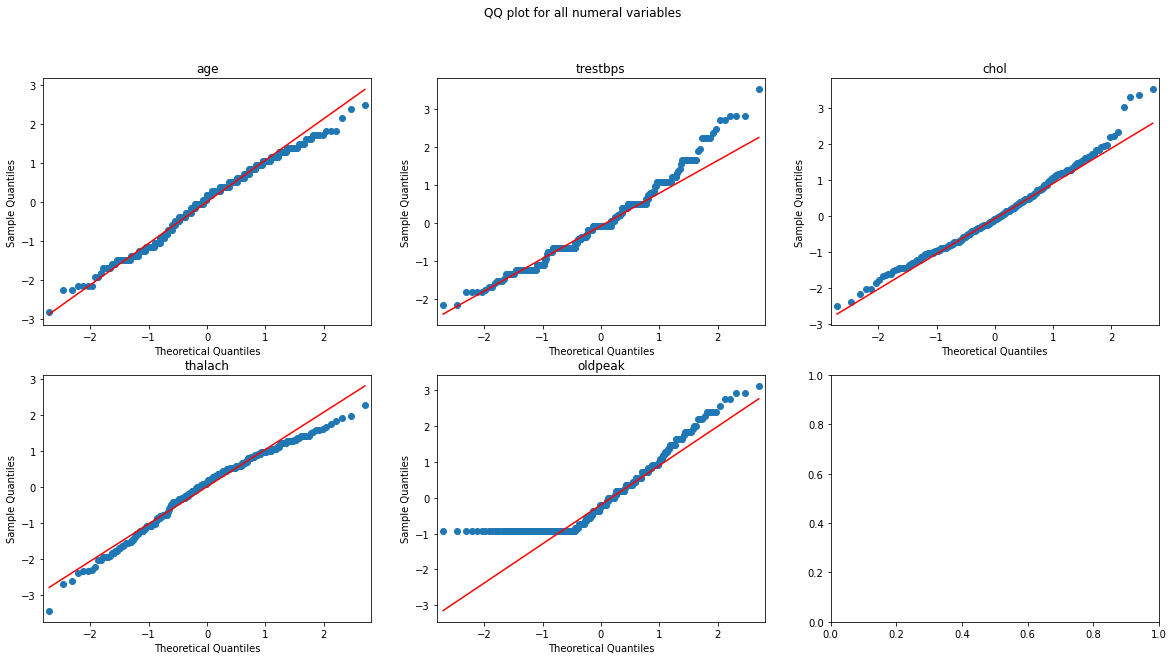

In [58]:
# QQ plot
numeral = [0,3,4,7,9]
X_numeral = X.iloc[: , numeral]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax= axes.flatten()

for i in range(5):
    sm.qqplot((X_numeral.iloc[:,i]), fit = True, line='q', ax=ax[i])
    ax[i].title.set_text(X_numeral.columns[i])

plt.suptitle('QQ plot for all numeral variables')
plt.show() 

In [16]:
# cleaned data
data = pd.read_csv("archive\heart.csv")
data = data.drop_duplicates()

data = np.array(data)
data_clean = data[(np.abs(stats.zscore(data)) < 3.5).all(axis=1)]

# normalize data
num_col = [0,3,4,7,9]
for i in num_col:
    data_clean[:,i] = (data_clean[:,i]-data_clean[:,i].mean())/np.sqrt(data_clean[:,i].var())

In [3]:
# simulated small and large data
# small data
X_sim, Y_sim = make_classification(n_features=13,n_samples=300,random_state=0)
# big data
X_sim1, Y_sim1 = make_classification(n_features=13,n_samples=10000,random_state=0)

### K-nearest neighbors algorithm

In [21]:
# The following code will build a KNN classifier. We will use euclidian distance
# to calculate the kth closest training observations to the testing observation.
# We will choose the mode class of the kth nearest observation as the protection
# of the training observation.

def eucledian_dist(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
def KNN_prediction(x_train, y , x_test, k):
    predictions = []
     
    for item in x_test:          
        point_dist = []
         
        for j in range(len(x_train)): 
            distances = eucledian_dist(np.array(x_train[j,:]) , item) 
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        dist = np.argsort(point_dist)[:k] 
        labels = y[dist]
         
        lab = mode(labels) 
        lab = lab.mode[0]
        predictions.append(lab)
 
    return predictions

In [7]:
# knn model testing with simulate data

start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim,X_test_sim,Y_train_sim,Y_test_sim=train_test_split(X_sim,Y_sim,test_size=0.2,random_state=i)
    Y_pred_sim = KNN_prediction(X_train_sim,Y_train_sim,X_test_sim , 10)
    accuracy_list.append(sum(Y_test_sim == Y_pred_sim)/X_test_sim.shape[0])
print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 11.468309879302979 seconds
Average accuracy: 0.8925
Accuracy variance: 0.0013


In [32]:
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim,X_test_sim,Y_train_sim,Y_test_sim=train_test_split(X_sim1,Y_sim1,test_size=0.007,random_state=i)
    Y_pred_sim = KNN_prediction(X_train_sim,Y_train_sim,X_test_sim , 10)
    accuracy_list.append(sum(Y_test_sim == Y_pred_sim)/X_test_sim.shape[0])
print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 600.2637026309967 seconds
Average accuracy: 0.8387
Accuracy variance: 0.0016


In [66]:
# model selection for best number of k by k-flod cross validation
# The following code use k fold cross-validation k = 20 to find the 
# best k for the KNN method. We will find the best model considering 
# the highest accuracy and f score.

X = data_clean[:,:13]
Y = np.matrix(data_clean[:,13]).T

kf = KFold(n_splits = 20, shuffle = True,random_state = 0)
k_flod_lst = list(kf.split(data_clean))

max_accuracy = 0
max_accuracy_n = 0
max_f = 0
max_f_n = 0
for i in range(10):    
    accuracy_list = []
    f_list = []
    for j in range(20):
        X_train = X[k_flod_lst[j][0],:]
        Y_train = Y[k_flod_lst[j][0],:]
        X_test = X[k_flod_lst[j][1],:]
        Y_test = Y[k_flod_lst[j][1],:]
        
        Y_pred = KNN_prediction(X_train,Y_train,X_test , i+1)
        accuracy_list.append(sum(Y_test == Y_pred)/X_test.shape[0])
        f_list.append(f1_score(Y_test, Y_pred))
        
    mean_accuracy = np.mean(accuracy_list)
    if mean_accuracy > max_accuracy:
        max_accuracy = mean_accuracy
        max_accuracy_n = i+1
        
    mean_f = np.mean(f_list)
    if mean_f > max_f:
        max_f = mean_f
        max_f_n = i+1
        
    #print(str(i+1) + ' nearest neighbor accuracy: ' + str(mean_accuracy) + '    F score: ' + str(mean_f))
print("Best n by accuracy is " + str(max_accuracy_n) + ', max accuracy: ' + str((max_accuracy*100).round(2)) + "%")
print("Best n by f score is " + str(max_f_n) + ', max f score: ' + str(max_f.round(4)))

Best n by accuracy is 9, max accuracy: 82.14%
Best n by f score is 9, max f score: 0.796


In [24]:
# KNN modeling performance

start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    Y_pred = KNN_prediction(X_train,Y_train,X_test , 8)
    accuracy_list.append(sum(Y_test == Y_pred)/X_test.shape[0])
print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 11.315605401992798 seconds
Average accuracy: 0.803
Accuracy variance: 0.002


### Neural network algorithm

In [4]:
# The following code will build a neural network model with on hidden layer.
# First, randomly generate the correct number of weights and biases 
# corresponding number of hidden layer nodes we choose. Then, we use forward
# propagation and backward propagation to find the gradient of the loss 
# function with respect to the weights and biases. Next, we use the gradient
# descent method to iterate and update the weights and biases, to find the 
# minimum of the loss function. We choose ReLU as the activation function 
# for the hidden layer and softmax as the activation function for the output layer. 

def start_weights_biases(features,classes,node):
    np.random.seed(0)
    W1 = np.random.rand(node, features) - 0.5
    b1 = np.random.rand(node, 1) - 0.5
    W2 = np.random.rand(classes, node) - 0.5
    b2 = np.random.rand(classes, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 2))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def neural_networks_prediction(X_train, Y, X_test, node, alpha, iterations=10000, e = 5e-4):
    W1, b1, W2, b2 = gradient_descent(X_train,Y,node,alpha)
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test)    
    return np.argmax(A2, 0)

def gradient_descent(X, Y, node, alpha, iterations=10000, e = 5e-4):    
    W1, b1, W2, b2 = start_weights_biases(13,2,node)
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    old = A2[0]

    for i in range(iterations):
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        
        if np.linalg.norm(A2[0] - old) / np.linalg.norm(A2[0]) < e:
            break
        old = A2[0]
        
    return W1, b1, W2, b2

In [5]:
# neural network model testing with simulate data
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim, Y_sim, test_size=0.2, random_state=i)
    X_train_sim = X_train_sim.T
    X_test_sim = X_test_sim.T
    Y_pred_sim = neural_networks_prediction(X_train_sim, Y_train_sim, X_test_sim, 10, 0.1)
    accuracy_list.append(sum(Y_test_sim == Y_pred_sim)/X_test_sim.shape[1])

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 2.425149917602539 seconds
Average accuracy: 0.9237
Accuracy variance: 0.0011


In [6]:
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim1, Y_sim1, test_size=0.007, random_state=i)
    X_train_sim = X_train_sim.T
    X_test_sim = X_test_sim.T
    Y_pred_sim = neural_networks_prediction(X_train_sim, Y_train_sim, X_test_sim, 10, 0.1)
    accuracy_list.append(sum(Y_test_sim == Y_pred_sim)/X_test_sim.shape[1])

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 32.45833468437195 seconds
Average accuracy: 0.8171
Accuracy variance: 0.0019


In [26]:
# model selection for best number of nodes by k-flod cross validation
# The following code use k fold cross-validation k = 20 to find the best 
# number of nodes in the hidden layer for the method of the neural network. 
# We will find the best model considering the highest accuracy and f score.

X = data_clean[:,:13].T
Y = data_clean[:,13]

kf = KFold(n_splits = 20, shuffle = True,random_state = 0)
k_flod_lst = list(kf.split(data_clean))
max_accuracy = 0
max_accuracy_n = 0
max_f = 0
max_f_n = 0
for i in range(10,26):
    accuracy_list = []
    f_list = []
    for j in range(20): 
        X_train = X[:,k_flod_lst[j][0]]
        Y_train = Y[k_flod_lst[j][0]]
        X_test = X[:,k_flod_lst[j][1]]
        Y_test = Y[k_flod_lst[j][1]]

        Y_pred = neural_networks_prediction(X_train, Y_train, X_test, i, 0.01)
        accuracy_list.append(sum(Y_test == Y_pred)/X_test.shape[1])
        f_list.append(f1_score(Y_test, Y_pred))
        
    mean_accuracy = np.mean(accuracy_list)
    if mean_accuracy > max_accuracy:
        max_accuracy = mean_accuracy
        max_accuracy_n = i
        
    mean_f = np.mean(f_list)
    if mean_f > max_f:
        max_f = mean_f
        max_f_n = i
        
    #print(str(i) + " hidden layer nodes accuracy: " + str(mean_accuracy) + '    F score: ' + str(mean_f))
print("Best nodes by accuaracy is " + str(max_accuracy_n) + ', max accuracy: ' + str((max_accuracy*100).round(2)) + "%")
print("Best nodes by f score is " + str(max_f_n) + ', max f score: ' + str(max_f.round(4)))

Best nodes by accuaracy is 12, max accuracy: 84.07%
Best nodes by f score is 12, max f score: 0.8557


In [28]:
# Neural network modeling performance
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.2, random_state=i)
    X_train = X_train.T
    X_test = X_test.T
    Y_pred = neural_networks_prediction(X_train, Y_train, X_test, 12, 0.01)
    accuracy_list.append(sum(Y_test == Y_pred)/X_test.shape[1])
print("Neural network modeling performance")
print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

Neural network modeling performance
run time: 5.7612199783325195 seconds
Average accuracy: 0.8328
Accuracy variance: 0.002


### Support Vector Machine algorithm

In [19]:
def svm_fit(X, y, l_r = 1e-3, Lambda = 1e-2, num_iter = 1000):
    """
    w*x-b ≥ 1 if yi = 1
    w*x-b < 1 otherwise
    keep updating w and b based on condition yi*(xi*w-b)
    """
    m,n = X.shape
    y2 = [-1 if yi==0 else 1 for yi in y]
    w = np.zeros(n)
    b = 0        
    for num in range(num_iter):
        for i, xi in enumerate(X):
            c = y2[i]* (float(np.dot(xi, np.array(w)))-b)
            if c >= 1:
                w = w - l_r * (2 * Lambda * w)
            else:
                w = w - l_r * (2 * Lambda * w - np.dot(xi,y2[i]))
                b = b - l_r * y2[i]
    return w,b
                    
def svm_predict(X,w,b):
    """
    predict the class of y given w and b
    """
    ans = np.dot(X, w) - b
    ans = np.sign(ans)
    ans = np.where(ans==-1,0,1)
    return ans

In [20]:
X = data_clean[:,:13]
Y = np.matrix(data_clean[:,13]).T

In [21]:
# SVM model testing with simulate data
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim, Y_sim, test_size=0.2, random_state=i)
    w,b = svm_fit(X_train_sim,Y_train_sim)
    Y_pred_sim = svm_predict(X_test_sim,w,b)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 105.4095709323883 seconds
Average accuracy: 0.9138
Accuracy variance: 0.0011


In [22]:
start_time = time.time()
accuracy_list = []
for i in range(10):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim1, Y_sim1, test_size=0.007, random_state=i)
    w,b = svm_fit(X_train_sim,Y_train_sim)
    Y_pred_sim = svm_predict(X_test_sim,w,b)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 518.9567642211914 seconds
Average accuracy: 0.8086
Accuracy variance: 0.0013


In [76]:
# SVM modeling performance
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    w,b = svm_fit(X_train,Y_train)
    Y_pred = svm_predict(X_test,w,b)
    a_s = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(a_s)
    
print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 175.05119109153748 seconds
Average accuracy: 0.8364
Accuracy variance: 0.0018


### Naive Bayes algorithm

In [14]:
def Naivebayes(X_train,y_train,X_test):
    """
    calculate posterior probability based on the Bayes' theorem and 
    select the class with the highest probability
    """
    m,n = X_train.shape
    class_y = np.unique(y_train)
    n_class_y = len(class_y)
    mean = np.zeros((n_class_y,n))
    var = np.zeros((n_class_y,n))
    prior = np.zeros(n_class_y)
    posteriors = []
    argmax_list = []
    for idx, classes in enumerate(class_y):
        X_c = X_train[y_train == classes]
        mean[idx,:] = X_c.mean(axis = 0)
        var[idx,:] = X_c.var(axis = 0)
        prior[idx] = X_c.shape[0] / float(m)
    for x in X_test:
        for idx, classes in enumerate(class_y):
            log_prior = np.log(prior[idx])
            posterior = np.sum(np.log((1 / np.sqrt(2 * np.pi * var[idx])) * (np.exp(-((x - mean[idx])**2) / (2 * var[idx])))))
            posterior = log_prior + posterior
            posteriors.append(posterior)
    posteriors = [posteriors[i:i + 2] for i in range(0, len(posteriors), 2)]
    for i in range(0,X_test.shape[0]):
        argmax_list.append(np.argmax(posteriors[i]))
    return np.array(argmax_list)

In [15]:
# Naive Bayes model testing with simulate data
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim, Y_sim, test_size=0.2, random_state=i)
    Y_pred_sim = Naivebayes(X_train_sim,Y_train_sim,X_test_sim)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 0.2622992992401123 seconds
Average accuracy: 0.9247
Accuracy variance: 0.001


In [17]:
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim1, Y_sim1, test_size=0.007, random_state=i)
    Y_pred_sim = Naivebayes(X_train_sim,Y_train_sim,X_test_sim)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 0.45973920822143555 seconds
Average accuracy: 0.785
Accuracy variance: 0.0023


In [79]:
X = data_clean[:,:13]
Y = data_clean[:,13]

In [80]:
# Naive Bayes modeling performance
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    Y_pred = Naivebayes(X_train,Y_train,X_test)
    a_s = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 0.45726680755615234 seconds
Average accuracy: 0.8347
Accuracy variance: 0.002


# Logistic Regression

In [10]:
#https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082
"""
*    Title: Gradient Descent for Logistics Regression in Python
*    Author: Hoang Phong
*    Date: Jul 30, 2021
*    Code version: 1.0
*    Availability: https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082
*
"""

def generateXvector(X):
    """ 
    Add the X0 column that is full of 1s to the dataset X array
    """    
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def theta_init(X):
    """ 
    Initializing a theta vector for all X's variables
    Each theta contains a random number
    This is the initial guess of theta
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def sigmoid_function(X):
    """ 
    Calculate the sigmoid value of the inputs
    """
    return 1/(1+math.e**(-X))

def fit(X,y,alpha, iterations, e = 0.001):
    """ 
    Optimize the logistic regression using Gradient Descent method
    X -> nd-array for independent variables 
    y -> 1d-array for response variable
    alpha -> learning rate or step size (float)
    iterations -> numbers of iterations (int)

    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    #iters = 0
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta_old = theta.copy()
        theta = theta_old - alpha * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        cost_lst.append(cost_value)
        if np.linalg.norm(theta - theta_old, ord = np.inf) / np.linalg.norm(theta, ord = np.inf) < e:
            break
    return theta, cost_lst

def column(matrix, i):
    """ 
    Returning the values to the specific variable column
    """
    return [row[i] for row in matrix]

def predict(X,y,alpha, iteration,X_test, y_test):
    """ 
    Predict the y-values based on the trained logistic regression model
    This function also fit the model as well
    
    """
    ideal = fit(X,y,alpha, iteration)[0]
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test,i-1)
    logistic_function = sigmoid_function(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    return logistic_function

In [11]:
def multi_run(x,y, alpha, run, max_iter):
    '''
    Check if the inputted variables are numpy array or not
    run n times according to user specification
    Split the data into training and testing dataset
    return accuracy, precisions, and recall list
    '''
    ac = []
    f_score = []
    
    
    if type(x) != "numpy.ndarray" and type(y) != "numpy.ndarray":
        x = np.array(x)
        y = np.array(y)
    else:
        pass
    
    for i in range(run):
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
        Y_pred = predict(X_train, Y_train, alpha, max_iter, X_test, Y_test)
        ac.append(accuracy_score(Y_test, Y_pred))
        f_score.append(f1_score(Y_test, Y_pred))
    return [ac, f_score]

def report(x):
    print("accuracy: {}, F score: {}".format(np.mean(x[0]),np.mean(x[1])))

In [12]:
# Logistic regression model testing with simulate data
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim, Y_sim, test_size=0.2, random_state=i)
    Y_pred_sim = predict(X_train_sim, Y_train_sim, 0.1, 1000, X_test_sim, Y_test_sim)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 1.4554197788238525 seconds
Average accuracy: 0.9157
Accuracy variance: 0.0009


In [13]:
start_time = time.time()
accuracy_list = []
for i in range(100):
    X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(X_sim1, Y_sim1, test_size=0.007, random_state=i)
    Y_pred_sim = predict(X_train_sim, Y_train_sim, 0.1, 1000, X_test_sim, Y_test_sim)
    a_s = accuracy_score(Y_test_sim, Y_pred_sim)
    accuracy_list.append(a_s)

print("run time: " + "%s seconds" % (time.time() - start_time))
print("Average accuracy: " + str(np.mean(accuracy_list).round(4)))
print("Accuracy variance: " + str(np.var(accuracy_list).round(4)))

run time: 17.414891719818115 seconds
Average accuracy: 0.8197
Accuracy variance: 0.0016


In [96]:
def cost_plot(X,y,alpha, iterations, e = 0.001):
    """ 
    Cost function graph
    The graph shows the change in difference between the actual outcome and the predicted outcomes over the 
    span of n iterations.
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)

    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta_old = theta.copy()
        theta = theta_old - alpha * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,len(cost_lst)),cost_lst[1:])
    plt.title('Cost function Graph: lr = {}'.format(alpha))
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')

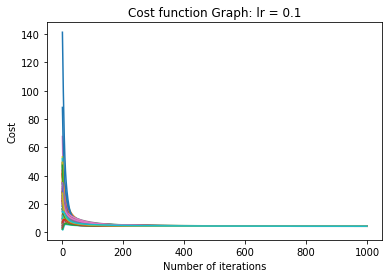

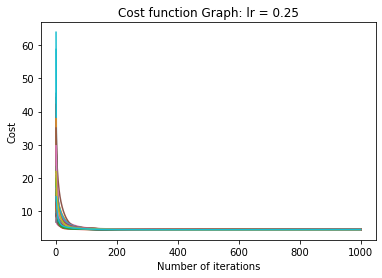

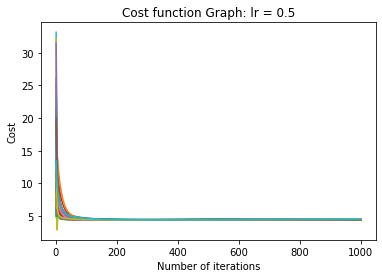

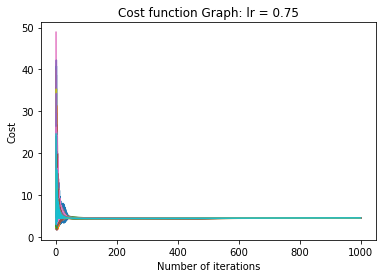

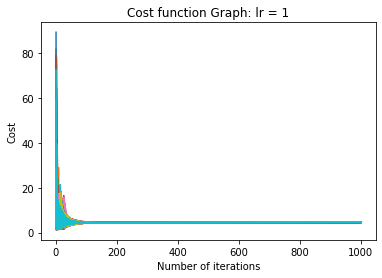

In [97]:
'''
Cost function graph for each learning rate for the simulated data
'''
for j in [0.1,0.25,0.5,0.75,1]:
    for i in range(100):
        x = np.array(X_sim1)
        y = np.array(Y_sim1)
        X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, test_size = 0.2)
        cost_plot(X_test, Y_test, j, 1000)
    plt.show()

In [18]:
X = data_clean[:,:13]
Y = np.matrix(data_clean[:,13]).T

In [19]:
for i in [0.1,0.25,0.5,0.75,1]:
    for j in [1000,10000]:
        start_time = time.time()
        run = multi_run(X,Y, i, 100, j)
        print('step size = ' + str(i) + " , iteration = " + str(j))
        print("run time: " + "%s seconds" % (time.time() - start_time))
        report(run)
        print('\n')

step size = 0.1 , iteration = 1000
run time: 4.102296829223633 seconds
accuracy: 0.8356666666666667, F score: 0.8550081166268002


step size = 0.1 , iteration = 10000
run time: 4.270813941955566 seconds
accuracy: 0.8284999999999998, F score: 0.8453778555768161


step size = 0.25 , iteration = 1000
run time: 3.5745885372161865 seconds
accuracy: 0.8324999999999999, F score: 0.850338528825348


step size = 0.25 , iteration = 10000
run time: 3.622415781021118 seconds
accuracy: 0.8363333333333332, F score: 0.8545640089920787


step size = 0.5 , iteration = 1000
run time: 2.820369005203247 seconds
accuracy: 0.8308333333333333, F score: 0.8478478121227081


step size = 0.5 , iteration = 10000
run time: 2.8222343921661377 seconds
accuracy: 0.8290000000000001, F score: 0.84903463989235


step size = 0.75 , iteration = 1000
run time: 2.390200138092041 seconds
accuracy: 0.830333333333333, F score: 0.8515353528826485


step size = 0.75 , iteration = 10000
run time: 4.920690059661865 seconds
accura

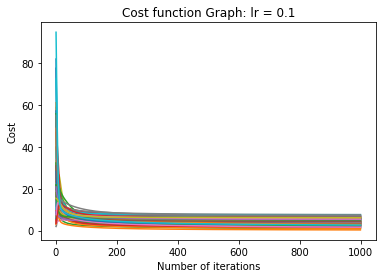

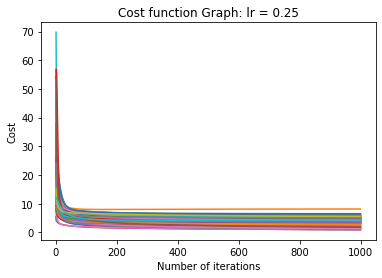

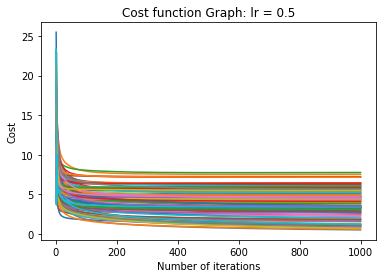

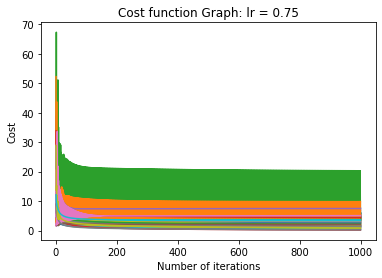

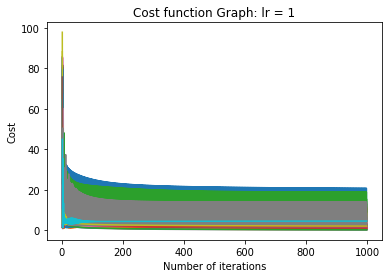

In [90]:
'''
Cost function graph for each learning rate for the real data
'''
for j in [0.1,0.25,0.5,0.75,1]:
    for i in range(100):
        x = np.array(X_normal)
        y = np.array(Y)
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
        cost_plot(X_test, Y_test, j, 1000)
    plt.show()

In [95]:
#Sklearn logistic function
def np_logit(x,y, run, max_iter):
    ac = []
    f_score= []
    if type(x) != "numpy.ndarray" and type(y) != "numpy.ndarray":
        x = np.array(x)
        y = np.array(y)
    else:
        pass
    
    for i in range(run):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
        classifier = LogisticRegression(random_state = 0, penalty = 'none', max_iter=max_iter)
        classifier.fit(X_train, Y_train)
        classifier.intercept_, classifier.coef_
        y_pred = classifier.predict(X_test)
        ac.append(accuracy_score(Y_test, y_pred))
        f_score.append(f1_score(Y_test, y_pred))
    return [ac, f_score]

logit1 = np_logit(X_normal,Y, 100, 1000)[0:3]

start = time.time()
logit2 = np_logit(X_normal,Y, 100, 10000)[0:3]
end = time.time()
print(end - start)

report(logit1)
report(logit2)
np.var(logit2)

0.9760560989379883
accuracy: 0.8258333333333333, F score: 0.8448319212765683
accuracy: 0.8331666666666666, F score: 0.8530216119051928


0.0016486899294153598

$$
\begin{aligned}
& \text {Performance for each algorithm runing 100 times with simmulation data: small data n = 300, big data n = 10000}\\
&\begin{array}{cccc}
\hline \hline \text { Algorithm } & \text {Average accuracy } & \text {Variance of accuracys} & \text { Run time (seconds) } \\
\hline \text { KNN k=10 small data } & 0.8925 & 0.0013 & 11.4683 \\
\text { KNN k=10big data } & 0.8387 & 0.0016 & 600.2637 \\
\text{ Neural network $\alpha: 0.01$, e = 5e-4 small data } & 0.9237 & 0.0011 & 2.4251 \\
\text{ Neural network $\alpha: 0.01$, e = 5e-4 big data } & 0.8171 & 0.0019 & 32.4583 \\
\text{ SVM small data } & 0.9138 & 0.0011 & 105.4096 \\
\text{ SVM big data } & 0.8086 & 0.0013 & 518.9568 \\
\text{ Naive Bayes small data } & 0.9247 & 0.001 & 0.2623 \\
\text{ Naive Bayes big data } & 0.785 & 0.0023 & 0.4597 \\
\text{ Logistic regression $\alpha: 0.1$, e = 1e-3 small data } & 0.9157 & 0.0009 & 1.4554 \\
\text{ Logistic regression $\alpha: 0.1$, e = 1e-3 big data } & 0.8197 & 0.0016 & 17.4149 \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Performance for each algorithm runing 100 times:}\\
&\begin{array}{cccc}
\hline \hline \text { Algorithm } & \text {Average accuracy } & \text {Variance of accuracys} & \text { Run time (seconds) } \\
\hline \text { KNN k=9 } & 0.803 & 0.002 & 11.3156 \\
\text{ Neural network: $\alpha: 0.01$, e = 5e-4 } & 0.8328 & 0.002 & 5.7612 \\
SVM & 0.8288 & 0.0022 & 117.0620 \\
\text{ Naive Bayes} & 0.8167 & 0.0021 & 0.3143 \\
\text{ Logistic regression: $\alpha: 0.1$, e = 1e-3} & 0.834 & 0.0017 & 4.1023 \\
\text{ Sklearn Logistic regression: iterations: 10,0000} &  0.8313 & 0.0048 & 0.8859 \\
\hline
& \text {Best model accuracy is Neural Network optimized by Gradient Descent, max average accuracy: 83.62%}\\
& \text {Best model by time is Naive Bayes fast time: 0.3143 seconds}\\
\end{array}
\end{aligned}
$$

### Reference
knn : https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

neural network : # https://www.kaggle.com/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras

SVM : https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/svm.py

Naive Bayes: https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/naivebayes.py

Logistic regression: https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082